This file generates new labels for the entropy and overlap experiment.

In [ ]:
import numpy as np
from scipy.stats import entropy, kstest, uniform, ks_2samp
import glob
import os
import pandas as pd
import sys

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
root = '/gdrive/MyDrive/cifar10_resnet/original/label_representations/labels/label_files' 
os.chdir(root)

## Computing Entropy, L1, L2

In [ ]:
sys.path.insert('../utils')
from metrics import shannon_entropy, l1_l2, check_uniform, check_sim

In [ ]:
categorical = np.array([1,0,0,0,0,0,0,0,0,0])
KS_stat, p = check_uniform(categorical)
p

0 1


1.9999999999999957e-10

In [ ]:
# original labels
metrics_orig = pd.DataFrame(columns=['Label', 'Entropy', 'DEntropy', 'L1', 'DL1', 'L2', 'DL2'])
metrics_orig.loc[len(metrics_orig.index)] = ['category', 0.47, 0.00,
                                               1.41, 0.00, 2.00, 0.00]

orig_dir = "/gdrive/MyDrive/cifar10_resnet/original/label_representations/labels/label_files/cifar10/"
original = glob.glob(orig_dir + '*.npy')

for file in original:
  label = file.split('/')[-1].split('_')[-1][:-4]
  array = np.load(file)

  entropies = []

  for i in range(10):
    file_label = array[i]
    entropies.append(shannon_entropy(file_label))
  
  l1, l2 = l1_l2(array)

  metrics_orig.loc[len(metrics_orig.index)] = [label, np.mean(entropies), np.std(entropies),
                                               np.mean(l1), np.std(l1), np.mean(l2), np.std(l2)]

metrics_orig = metrics_orig.round(2)
metrics_orig

,Label,Entropy,DEntropy,L1,DL1,L2,DL2
0,category,0.47,0.00,1.41,0.00,2.00,0.00
1,bert,11.05,0.03,5.72,0.95,2.06,0.24
2,composite,12.00,0.00,24.06,3.36,14.12,1.72
3,glove,5.64,0.00,7.35,1.69,1.30,0.31
4,lowdim,3.32,0.00,3.41,0.77,1.30,0.25
5,random,12.00,0.00,25.82,0.94,6.35,0.16
6,shuffle,11.35,0.35,35.26,2.16,15.61,1.44
7,speech,11.35,0.35,23.79,5.15,9.76,2.39
8,uniform,0.00,0.00,26.07,15.72,26.07,15.72


In [ ]:
metrics_orig = pd.DataFrame({c: metrics_orig.filter(like=c).astype(str).apply('±'.join, 1) 
                         for c in metrics_orig.columns.str[-1].unique()})
metrics_orig.columns = ['Label', 'Entropy', 'L1', 'L2']
metrics_orig

,Label,Entropy,L1,L2
0,category,0.47±0.0,1.41±0.0,2.0±0.0
1,bert,11.05±0.03,5.72±0.95,2.06±0.24
2,composite,12.0±0.0,24.06±3.36,14.12±1.72
3,glove,5.64±0.0,7.35±1.69,1.3±0.31
4,lowdim,3.32±0.0,3.41±0.77,1.3±0.25
5,random,12.0±0.0,25.82±0.94,6.35±0.16
6,shuffle,11.35±0.35,35.26±2.16,15.61±1.44
7,speech,11.35±0.35,23.79±5.15,9.76±2.39
8,uniform,0.0±0.0,26.07±15.72,26.07±15.72


In [ ]:
print(metrics_orig.to_latex(index=False))

\begin{tabular}{llll}
\toprule
    Label &    Entropy &          L1 &          L2 \\
\midrule
 category &   0.47±0.0 &    1.41±0.0 &     2.0±0.0 \\
     bert & 11.05±0.03 &   5.72±0.95 &   2.06±0.24 \\
composite &   12.0±0.0 &  24.06±3.36 &  14.12±1.72 \\
    glove &   5.64±0.0 &   7.35±1.69 &    1.3±0.31 \\
   lowdim &   3.32±0.0 &   3.41±0.77 &    1.3±0.25 \\
   random &   12.0±0.0 &  25.82±0.94 &   6.35±0.16 \\
  shuffle & 11.35±0.35 &  35.26±2.16 &  15.61±1.44 \\
   speech & 11.35±0.35 &  23.79±5.15 &   9.76±2.39 \\
  uniform &    0.0±0.0 & 26.07±15.72 & 26.07±15.72 \\
\bottomrule
\end{tabular}



In [ ]:
# new labels

new_dir = "/gdrive/MyDrive/cifar10_resnet/original/label_representations/labels/label_files/new/"
new = glob.glob(new_dir + '*.npy')

for file in new:
  print(file.split('/')[-1])
  file = np.load(file)
  entropies = []
  sim = []
  print(file.shape)
  for i in range(10):
    file_label = file[i]
    entropies.append(shannon_entropy(file_label))
    sim.append(KL_uniform(file_label))
  print(f"Entropy: {np.mean(entropies)} - SD: {np.std(entropies)}",)
  print(f"KL: {np.mean(sim)} - SD: {np.std(sim)}",)
  print()

cifar10_normal_dim=1.npy
(10, 1)
Entropy: 0.0 - SD: 0.0
KL: 0.0 - SD: 0.0

cifar10_normal_dim=5.npy
(10, 5)
Entropy: 2.3219280948873626 - SD: 0.0
KL: 0.0 - SD: 0.0

cifar10_normal_dim=10.npy
(10, 10)
Entropy: 3.3219280948873626 - SD: 4.440892098500626e-16
KL: 0.0 - SD: 0.0

cifar10_normal_dim=30.npy
(10, 30)
Entropy: 4.906890595608518 - SD: 0.0
KL: 0.0 - SD: 0.0

cifar10_normal_dim=50.npy
(10, 50)
Entropy: 5.643856189774724 - SD: 0.0
KL: 0.0 - SD: 0.0

cifar10_normal_dim=100.npy
(10, 100)
Entropy: 6.6418561897747255 - SD: 0.005999999999999873
KL: 0.0005500430304887956 - SD: 0.001650129091465426

cifar10_normal_dim=200.npy
(10, 200)
Entropy: 7.643856189774726 - SD: 0.0
KL: 3.2034265038149176e-16 - SD: 4.930380657631324e-32

cifar10_normal_dim=500.npy
(10, 500)
Entropy: 8.963384284662082 - SD: 0.0026532998322840273
KL: 0.0006664530106681262 - SD: 0.0007362102486009177

cifar10_normal_dim=1000.npy
(10, 1000)
Entropy: 9.961584284662084 - SD: 0.003515679166249209
KL: 0.0011649151076227077 -

## Label 1: Varying entropy labels

These will have varying dimensions and will be generated from the normal distribution with mean equal to the label number and sd = 0.1.

In [ ]:
dimensions = [1,5,10,30,50,100,200,500,1000,2000,4000]

for dim in dimensions:
  entropies = []
  labels = np.empty((10,dim))

  for i in range(10):
    label = np.random.normal(i, 0.1, dim)
    labels[i] = label
    entropies.append(entropy(label.flatten(),base=2))

  print(entropies)
  np.save(root + f"/normal_dim={dim}.npy", labels)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[-inf, 2.3195557553999593, 2.318284455225702, 2.321254995063744, 2.321681400082231, 2.3217355707665948, 2.3218265517930026, 2.3215878547348017, 2.3218309417558745, 2.3218840550899325]
[-inf, 3.30865311016134, 3.320858167728647, 3.3217022014092943, 3.321420642537471, 3.321578610370663, 3.3215382450825626, 3.321849530020077, 3.3217547890275005, 3.3218383664152733]
[-inf, 4.903118732417932, 4.905186073746717, 4.906191655476538, 4.906568094814119, 4.906624483879274, 4.906741176379339, 4.906757291719274, 4.906779833226277, 4.906757405829055]
[-inf, 5.638967998223055, 5.64143146682877, 5.642820892290897, 5.643352186151011, 5.643658273818901, 5.643669097803942, 5.643705850920392, 5.64375621186414, 5.64373698995026]
[-inf, 6.63515010611343, 6.64170939571531, 6.643223995447357, 6.643362072184557, 6.643567666715621, 6.643616814418813, 6.643709545446811, 6.643741928124448, 6.643766490405514]
[-inf, 7.636710983325773, 7.642097234308782, 7.64291386

## Label 2: Varying overlap across labels

The labels will have dimension 50, and drawn from the uniform distribution.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
gaps = [10,1,0.1,0]
lb = 0
ub = 9
dim = 50

label_dict = {}

for gap in gaps:
  labels = np.empty((10,dim))
  for i in range(10):
    labels[i] = np.random.uniform(low=lb+(i*gap), high=ub+(i*gap), size=dim)
  label_dict[gap] = labels

10
5.643856189774724 0.0


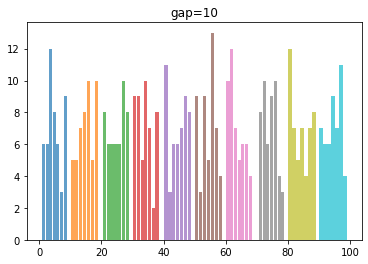

1
5.643856189774724 0.0


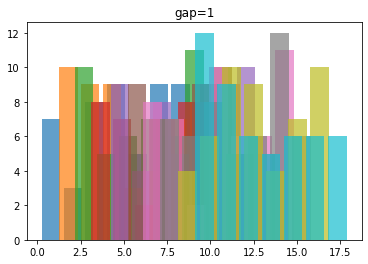

0.1
5.643856189774724 0.0


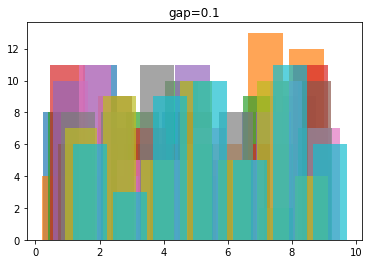

0
5.643856189774724 0.0


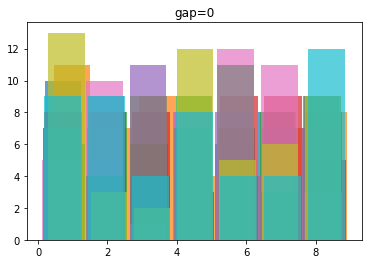

In [ ]:
for k,v in label_dict.items():
  print(k)
  entropies = []
  name = "gap=" + str(k)
  plt.title(name)
  for i in range(10):
    plt.hist(x=v[i].flatten(), bins='auto', alpha=0.7, rwidth=0.85)
    entropies.append(shannon_entropy(v[i]))
    #print(v[i])

  print(np.mean(entropies), np.std(entropies))
  plt.show()

In [ ]:
% cd ..

/gdrive/.shortcut-targets-by-id/1c2LSqs3KLPC0GItMw4Fbh9nCUbujuKG_/cifar10_resnet/original/label_representations/labels


In [ ]:
dir = root + '/overlap/'
for k,v in label_dict.items():
  np.save(dir + f"uniform_gap={k}.npy", v)

In [ ]:
! python compute_entropy.py label_files/overlap

----------------------
label_files/overlap/cifar10_uniform_gap=10.npy min: 0.0
label_files/overlap/cifar10_uniform_gap=10.npy max: 1.0
label_files/overlap/cifar10_uniform_gap=10.npy std: 0.29337225250763876
label_files/overlap/cifar10_uniform_gap=10.npy entropy: 5.609509770139509
label_files/overlap/cifar10_uniform_gap=10.npy entropy std: 0.08729732318979666
label_files/overlap/cifar10_uniform_gap=10.npy average dist: 0.37291984939763995
label_files/overlap/cifar10_uniform_gap=10.npy L2 dist: 18.645992469882
label_files/overlap/cifar10_uniform_gap=10.npy L2 dist std: 11.250902473727322
label_files/overlap/cifar10_uniform_gap=10.npy L1 dist: 2.6582612757748447
label_files/overlap/cifar10_uniform_gap=10.npy L1 dist std: 1.5782782098269386
label_files/overlap/cifar10_uniform_gap=10.npy shape: (10, 50)
----------------------
----------------------
label_files/overlap/cifar10_uniform_gap=1.npy min: 0.0
label_files/overlap/cifar10_uniform_gap=1.npy max: 1.0
label_files/overlap/cifar10_unifor